# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import keras
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils

%matplotlib inline

Using TensorFlow backend.


# Preparing Dataset

In [2]:
def load_dataset(fname):
    # read dataset
    dataset = pd.read_csv(fname, comment='#')

    # compositions to wt.%
    dataset.C *= 100
    dataset.Mn *= 100
    dataset.Si *= 100
    dataset.Cr *= 100
    dataset.Ni *= 100

    # temperatures to oC
    dataset.A1 -= 273.15
    dataset.A1prime -= 273.15
    dataset.A3 -= 273.15

    return dataset

In [3]:
def prepare_dataset(fname):
    raw_df = load_dataset(fname)
    
    if set(['file']).issubset(raw_df.columns):
        raw_df = raw_df.drop(['file'], axis=1)
    if set(['macro']).issubset(raw_df.columns):
        raw_df = raw_df.drop(['macro'], axis=1)
    
    df = raw_df.copy()

    df = df.drop(['A1', 'A1prime', 'A3'], axis=1)
    df['eutectoid'] = (df['eutectoid'].map(lambda x: 1 if x == 'hiper' else 0))
    
    return df

In [4]:
def normalize_all_data(df):
    scaler = MinMaxScaler(feature_range=[-1, 1])
    scaler.fit(df.loc[:, ['C','Mn','Si','Cr','Ni']])
    df.loc[:, ['C','Mn','Si','Cr','Ni']] = scaler.transform(df.loc[:, ['C','Mn','Si','Cr','Ni']])
    return df

In [10]:
def split_between_train_and_test(df, size, target_var='A3'):
    #train size may be 0.8, 0.7 or 0.99
    target = df[target_var]
    features = df.iloc[:, :20]
    X_train, X_test, y_train, y_test = train_test_split(
        features,
        target,
        train_size=size,
        random_state=42
    )
    
    X_train = X_train.drop([target_var], axis=1)
    X_test = X_test.drop([target_var], axis=1)
    
    print('Train size: {}'.format(X_train.shape))
    print('Test size: {}'.format(X_test.shape))
    return X_train, y_train, X_test, y_test

In [11]:
df = prepare_dataset('../../databases/Tcriticalcopy.csv')
# df = normalize_all_data(df)
df.head()

,C,Mn,Si,Cr,Ni,eutectoid
0,0.0,0.0001,0.0001,0.0001,0.000100,0
1,0.0,0.0001,0.0001,0.0001,0.750075,0
2,0.0,0.0001,0.0001,0.0001,1.500050,0
3,0.0,0.0001,0.0001,0.0001,2.250025,0
4,0.0,0.0001,0.0001,0.0001,3.000000,0


In [12]:
X_train, y_train, X_test, y_test = split_between_train_and_test(df, 0.8, 'eutectoid')

Train size: (5500, 5)
Test size: (1375, 5)


/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


# The Model

In [54]:
# Creating a KERAS model
model = Sequential()
model.add(Dense(10, input_dim=5, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

In [55]:
# Adding callback functions that they will run in every epoch
# testmodelcb = keras.callbacks.LambdaCallback(on_epoch_end=save_model_prediction_graph)

In [56]:
# opt = optimizers.sgd(lr=.1, momentum=0)
# opt = optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
opt = optimizers.Adamax()

model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
loss = []
acc = []

In [57]:
history = model.fit(X_train, y_train, epochs=100, verbose=1)
loss += history.history['loss']
acc += history.history['acc']

Epoch 1/100
5500/5500 [==============================] - 1s 112us/step - loss: 0.5504 - acc: 0.7005
Epoch 2/100
5500/5500 [==============================] - 0s 43us/step - loss: 0.3871 - acc: 0.8558
Epoch 3/100
5500/5500 [==============================] - 0s 43us/step - loss: 0.2677 - acc: 0.9102
Epoch 4/100
5500/5500 [==============================] - 0s 43us/step - loss: 0.2062 - acc: 0.9309
Epoch 5/100
5500/5500 [==============================] - 0s 39us/step - loss: 0.1656 - acc: 0.9462
Epoch 6/100
5500/5500 [==============================] - 0s 44us/step - loss: 0.1411 - acc: 0.9567
Epoch 7/100
5500/5500 [==============================] - 0s 44us/step - loss: 0.1243 - acc: 0.9635
Epoch 8/100
5500/5500 [==============================] - 0s 42us/step - loss: 0.1126 - acc: 0.9685
Epoch 9/100
5500/5500 [==============================] - 0s 43us/step - loss: 0.1057 - acc: 0.9715
Epoch 10/100
5500/5500 [==============================] - 0s 41us/step - loss: 0.1009 - acc: 0.9733
Epoch 11

5500/5500 [==============================] - 0s 56us/step - loss: 0.0659 - acc: 0.9829
Epoch 83/100
5500/5500 [==============================] - 0s 43us/step - loss: 0.0659 - acc: 0.9838
Epoch 84/100
5500/5500 [==============================] - 0s 55us/step - loss: 0.0654 - acc: 0.9838
Epoch 85/100
5500/5500 [==============================] - 0s 48us/step - loss: 0.0656 - acc: 0.9844
Epoch 86/100
5500/5500 [==============================] - 0s 52us/step - loss: 0.0654 - acc: 0.9836
Epoch 87/100
5500/5500 [==============================] - 0s 49us/step - loss: 0.0654 - acc: 0.9831
Epoch 88/100
5500/5500 [==============================] - 0s 58us/step - loss: 0.0646 - acc: 0.9845
Epoch 89/100
5500/5500 [==============================] - 0s 46us/step - loss: 0.0653 - acc: 0.9833
Epoch 90/100
5500/5500 [==============================] - 0s 66us/step - loss: 0.0648 - acc: 0.9847
Epoch 91/100
5500/5500 [==============================] - 0s 52us/step - loss: 0.0646 - acc: 0.9835
Epoch 92/100


Test loss): [0.06323488976196809, 0.9847272727272727]


Text(0, 0.5, 'Expected values')

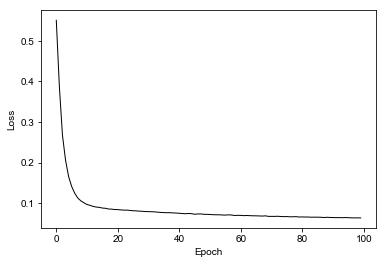

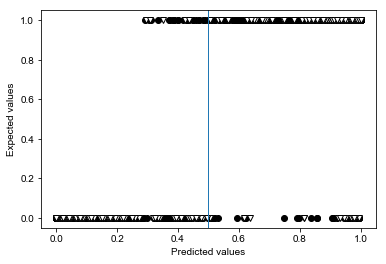

In [58]:
fig, ax = plt.subplots()

ax.plot(loss, color='k', label='Loss')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss):', score)

fig, ax = plt.subplots()
ax.plot(model.predict(X_train), y_train, 'ko')
ax.plot(model.predict(X_test), y_test, 'kv', mfc='white')
# ax.plot([-1,1],[-1,1],'r-')
ax.axvline(.5)
ax.set_xlabel('Predicted values')
ax.set_ylabel('Expected values')

In [79]:
y_predict = np.vectorize(lambda x: 1 if x > .5 else 0)(model.predict(X_train)).T[0]
np.count_nonzero(y_predict == y_train.values)/len(y_predict)


0.9852727272727273